In [1]:
#installing nltk's langdetect package
!pip install langdetect

     |████████████████████████████████| 981 kB 4.7 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=0f31e44878621158023a1a46302d3ce1b18fb26d57500ed31d225ae6874433cd
  Stored in directory: /home/ucloud/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
from langdetect import detect #nltk's language detector package

In [3]:
#reading in the raw data from 
#https://www.kaggle.com/sarahdejong/lyrics?fbclid=IwAR3mcIEne5zUKJwEu0mQ0hN7hYfAFTLZd392UaGT6Ru4lbQzAqSzddSvrkk 
data = pd.read_csv("lyrics.csv")
data

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
...,...,...,...,...,...,...
362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,"I gotta say\nBoy, after only just a couple of ..."
362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring\nYou made m...
362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth\nLooks ...
362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth\nAnd I'm meas...


In [4]:
#sort data by year (ascending)
data_sorted = data.sort_values("year")
data_sorted.iloc[0:10 , ]

,index,song,year,artist,genre,lyrics
315540,315540,let-s-lurk,67,giggs,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...
335205,335205,i-can-t-believe,112,faith-evans,Pop,[Chorus]\nI can't believe that love has gone a...
147914,147914,it-s-over-now-remix,112,g-dep,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...
69708,69708,anywhere-remix,112,dru-hill,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn..."
238541,238541,come-see-me-remix,112,black-rob,Hip-Hop,"Baby, you can come see me 'cause I need you he..."
27657,27657,star,702,clipse,Hip-Hop,You're my star\nIt's such a wonder how you shi...
124916,124916,without-you,1968,fleetwood-mac,Rock,I'm crazy for my baby\nBut my baby she don't l...
91831,91831,mr-big,1970,the-free,Rock,NaN
273603,273603,in-your-time,1970,christopher,Rock,NaN
273604,273604,wilbur-lite,1970,christopher,Rock,NaN


In [5]:
#the year of a couple of songs is mixed up with the artist name in cases where the artist's name was a number
data_sorted.iloc[0,2] = 2016 #actual year / adding to year column to correct
data_sorted.iloc[0,3] = 67 #name of artist not year / transfering to name column
data_sorted.iloc[1,2] = 1996
data_sorted.iloc[1,3] = 112
data_sorted.iloc[2,2] = 2000
data_sorted.iloc[2,3] = 112
data_sorted.iloc[3,2] = 1999
data_sorted.iloc[3,3] = 112
data_sorted.iloc[4,2] = 1996
data_sorted.iloc[4,3] = 112
data_sorted.iloc[5,2] = 2003
data_sorted.iloc[5,3] = 702
data_sorted

,index,song,year,artist,genre,lyrics
315540,315540,let-s-lurk,2016,67,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...
335205,335205,i-can-t-believe,1996,112,Pop,[Chorus]\nI can't believe that love has gone a...
147914,147914,it-s-over-now-remix,2000,112,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...
69708,69708,anywhere-remix,1999,112,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn..."
238541,238541,come-see-me-remix,1996,112,Hip-Hop,"Baby, you can come see me 'cause I need you he..."
...,...,...,...,...,...,...
112168,112168,minhoca,2038,anita,Rock,NaN
112167,112167,pipi-das-meias-altas,2038,anita,Rock,NaN
112163,112163,todos-os-patinhos,2038,anita,Rock,NaN
112164,112164,joana-come-a-papa,2038,anita,Rock,NaN


In [6]:
#difference between with and without NaN: loosing 95681 rows (out of 362237)
len(data_sorted) - len(data_sorted.dropna())

95681

In [7]:
data_clean = data_sorted.dropna()
data_clean #266556 rows (songs)

,index,song,year,artist,genre,lyrics
315540,315540,let-s-lurk,2016,67,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...
335205,335205,i-can-t-believe,1996,112,Pop,[Chorus]\nI can't believe that love has gone a...
147914,147914,it-s-over-now-remix,2000,112,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...
69708,69708,anywhere-remix,1999,112,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn..."
238541,238541,come-see-me-remix,1996,112,Hip-Hop,"Baby, you can come see me 'cause I need you he..."
...,...,...,...,...,...,...
182189,182189,i-had-a-home,2016,bach-mai,Other,I had a place to live\nA warm bed to sleep in\...
182190,182190,daybreak,2016,bach-mai,Other,I know that I am not alone\nAnd if you think t...
182191,182191,feeling-this-low,2016,bach-mai,Other,I heard there was another man another pair of ...
63737,63737,i-wish-i-was,2016,avett-brothers,Country,I wish I was a flame dancing in a candle\nLigh...


In [8]:
#let's detect undetectable language (japanese symbols) and filter them alongside with non-english texts
lang=[]
temp=[]
for index, row in data_clean.iterrows():
    temp = index, row['lyrics']
    try:
        language = detect(str(temp))
    except:
        language = "error"
        print('NA')
    lang.append(language)
data_clean.insert(6, 'lang', value=lang) #new language column

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA


In [15]:
#looking at all the languages detected
data_clean['lang'].unique()

array(['en', 'id', 'ro', 'pt', 'it', 'ca', 'so', 'sk', 'fr', 'af', 'sv',
       'da', 'tl', 'cy', 'de', 'es', 'sw', 'hu', 'pl', 'fi', 'no',
       'error', 'nl', 'hr', 'tr', 'sl', 'lt', 'cs', 'ja', 'sq', 'vi',
       'et', 'lv', 'uk'], dtype=object)

In [19]:
#identifying number of 'error's detected (lang that cannot be identified)
errors = data_clean[data_clean['lang'] == 'error']
len(errors) #39

39

In [20]:
#removing errors
data_clean = data_clean[data_clean['lang'] != 'error']
len(data_sorted)-len(data_clean)
#95720 in total

95720

In [21]:
#identifying non-English lyrics
other_lang = data_clean[data_clean['lang'] != 'en']
len(other_lang)
# 28621 non-english lyrics out of the 28621

28621

In [22]:
#deleting non-English lyrics
eng_lang = data_clean[data_clean['lang'] == 'en']
len(eng_lang) # 237896 english lyrics

237896

In [23]:
#number of artists
artists = eng_lang['artist'].unique()
len(artists) #12830

12830

In [25]:
#number of genres
genres = eng_lang['genre'].unique() 
len(genres) #12 genres

12

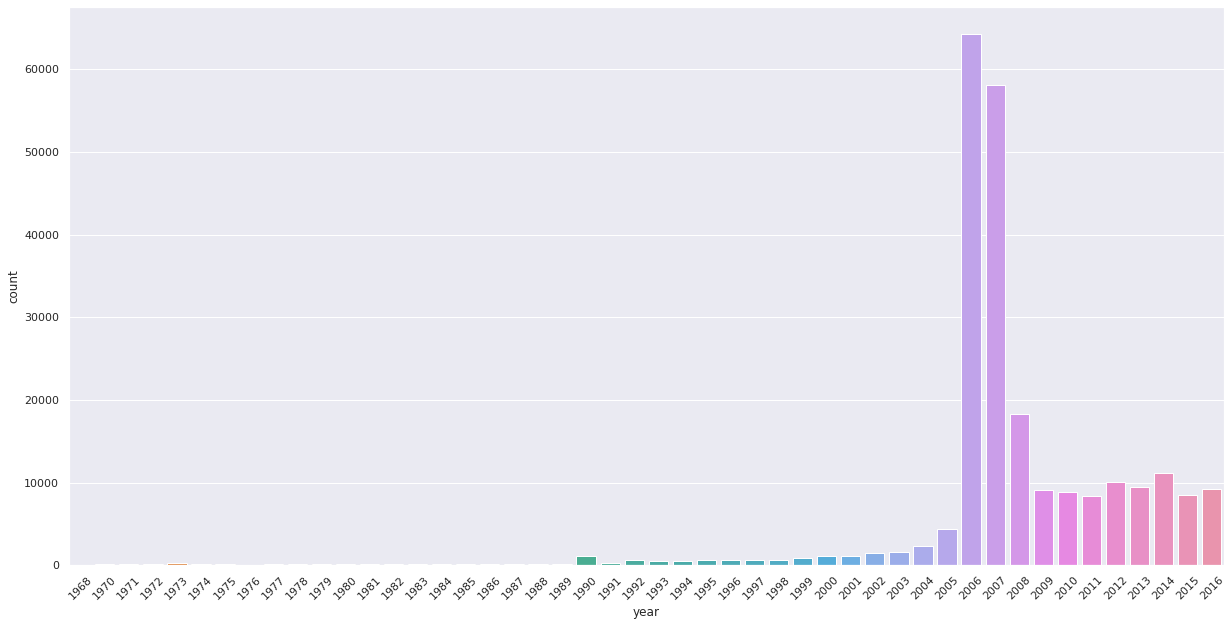

In [26]:
#plotting data by year
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(x ='year', data = eng_lang)
plt.xticks(rotation=45)
plt.show()

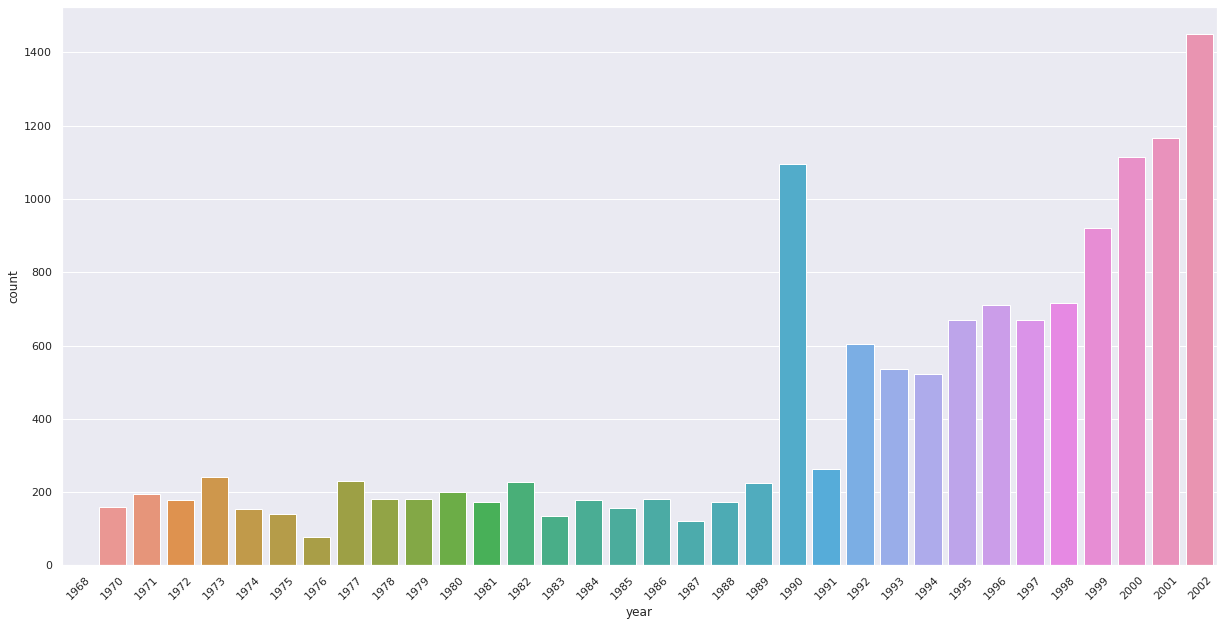

In [27]:
#plotting until 2003 to see smaller data densities better
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(x ='year', data = eng_lang[eng_lang['year']<2003])
plt.xticks(rotation=45)
plt.show()

In [28]:
#printing: 1968 (least songs), 1976 (2nd least songs), and 2006 (most songs)
print(len(eng_lang[eng_lang['year'] == 1976]), len(eng_lang[eng_lang['year'] == 2006]), len(eng_lang[eng_lang['year'] == 1968]) ) 
# second lowest number of songs is in 1976, 77 songs,
# and the most songs in 2006, 64269
# 1968: 1 song

77 64269 1


In [29]:
#looking at range of years
sorted(eng_lang['year'].unique())

[1968,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [33]:
#we exclude 1968 because of the year gap and it's one song
eng_lang = eng_lang[eng_lang['year'] != 1968]
min(eng_lang['year']) #starting with 1970

1970

In [34]:
#checking number of artists once again
artists = list(eng_lang['artist'].unique())
len(artists) # still 12830 artists

12830

In [44]:
eng_lang = eng_lang.drop(['lang','index'], axis = 1)
eng_lang

,song,year,artist,genre,lyrics
315540,let-s-lurk,2016,67,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...
335205,i-can-t-believe,1996,112,Pop,[Chorus]\nI can't believe that love has gone a...
147914,it-s-over-now-remix,2000,112,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...
69708,anywhere-remix,1999,112,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn..."
238541,come-see-me-remix,1996,112,Hip-Hop,"Baby, you can come see me 'cause I need you he..."
...,...,...,...,...,...
182189,i-had-a-home,2016,bach-mai,Other,I had a place to live\nA warm bed to sleep in\...
182190,daybreak,2016,bach-mai,Other,I know that I am not alone\nAnd if you think t...
182191,feeling-this-low,2016,bach-mai,Other,I heard there was another man another pair of ...
63737,i-wish-i-was,2016,avett-brothers,Country,I wish I was a flame dancing in a candle\nLigh...


In [45]:
#saving cleaned dataset (before gender annotation)
eng_lang.to_csv('data_clean_presex.csv',index=False)